## Import Necessary Libraries

In [51]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from scipy.stats import mode


## Read Datasets

Reading audit dataset

In [52]:
audit_risk_data = pd.read_csv("audit_data/audit_risk.csv")
audit_risk_data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [53]:
audit_risk_data.shape

(776, 27)

In [54]:
audit_risk_data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

Check whether there is null value or not

In [55]:
audit_risk_data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

According to this result, there is null value in dataset. 

In [56]:
print("Mode: {}".format(audit_risk_data.Money_Value.mode()))
print("Mean: {}".format(audit_risk_data.Money_Value.mean()))
print("Median: {}".format(audit_risk_data.Money_Value.median()))

Mode: 0    0.0
Name: Money_Value, dtype: float64
Mean: 14.137630967741934
Median: 0.09


Fill the null value with mean.

In [57]:
audit_risk_data['Money_Value'] = audit_risk_data['Money_Value'].fillna(audit_risk_data.Money_Value.mean())


Check if there is a still null value or not

In [58]:
audit_risk_data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

There is no longer null values

Check the data type:

In [59]:
audit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     776 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

When converthing LOCATION_ID column type from object to integer using this: audit_risk_data['LOCATION_ID'] = audit_risk_data['LOCATION_ID'].astype(int), an error occurred. 
The error says "invalid literal for int() with base 10: 'LOHARU' ". 


Check the value counts in LOCATION_ID columns

In [60]:
counts = audit_risk_data['LOCATION_ID'].value_counts()
print(counts)

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
15         35
13         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
28          8
21          8
27          8
43          7
25          6
20          5
7           4
30          4
38          4
36          4
3           3
40          3
35          2
44          1
NUH         1
LOHARU      1
SAFIDON     1
23          1
42          1
41          1
34          1
33          1
24          1
17          1
Name: LOCATION_ID, dtype: int64


According to this, there are some string value in this column. 
To handle this, first, find only the indices of non-integer values. 
Then, calculate the mean of the "LOCATION_ID" column in the dataset named "numeric_df" 
and replaces the "LOCATION_ID" values contained in the rows in the "non_numeric_indices" list with this mean value. 
And, finally, control the number of the indices of non-integer values which should be empty.

In [61]:
# select just LOCATION_ID column
location_id = audit_risk_data["LOCATION_ID"]

# a function to convert values to integer
def str_to_int(val):
    try:
        int(val)
        return False
    except ValueError:
        return True

#find only the indices of non-integer values. 
non_numeric_indices = [i for i, val in location_id.items() if str_to_int(val)]

print(f"There are {len(non_numeric_indices)} non-numerical values. Indexes: {non_numeric_indices}")


numeric_df = audit_risk_data.copy()
numeric_df = numeric_df.drop(non_numeric_indices)
numeric_df["LOCATION_ID"] = pd.to_numeric(numeric_df["LOCATION_ID"])

mean_location_id = numeric_df["LOCATION_ID"].mean()
audit_risk_data.loc[non_numeric_indices, "LOCATION_ID"] = mean_location_id


#find only the indices of non-integer values. 
non_numeric_indices = [i for i, val in location_id.items() if str_to_int(val)]

print("After replacing the LOCATION_ID values contained in the rows in the non_numeric_indices list with this mean value:")
print(f"There are {len(non_numeric_indices)} non-numerical values. Indexes: {non_numeric_indices}")




There are 3 non-numerical values. Indexes: [351, 355, 367]
After replacing the LOCATION_ID values contained in the rows in the non_numeric_indices list with this mean value:
There are 0 non-numerical values. Indexes: []


Change data type of LOCATION_ID from object to numeric

In [62]:

audit_risk_data['LOCATION_ID'] = pd.to_numeric(audit_risk_data['LOCATION_ID'], errors='coerce')


Check the data type:

In [63]:
audit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    float64
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     776 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

As you can see, LOCATION_ID is no longer an object.

In [64]:
audit_risk_data.describe()


,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,14.856404,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,9.872154,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,1.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,8.000000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,13.000000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,19.000000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,44.000000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


Reading bike sharing dataset 

In [65]:
day_data = pd.read_csv("Bike-Sharing-Dataset/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [66]:
day_data.shape

(731, 16)

In [67]:
day_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Check whether there is null value or not

In [68]:
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [69]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


I chose to drop this column because it is a object type and in the dataset there are information about year and month.

In [70]:

day_data = day_data.drop("dteday", axis = 1)


Drop this column because it is a record directory.

In [71]:
day_data = day_data.drop("instant", axis = 1)


In [72]:
day_data.shape

(731, 14)

In [73]:
day_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [74]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB


In [75]:
# Print Confsion Matrix

def ViewConfusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.rcParams["figure.figsize"] = [12,9]
    skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    plt.show()

In [76]:
# Print Accuracy 

def ViewAccuracy(y_test, y_pred):
    print("Accuracy : %",accuracy_score(y_test, y_pred) * 100)

In [77]:
# Print Mean Squared Error 

def ViewMeanSquaredError(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error: {:.2f}".format(mse))

In [78]:
# Print Mean Absolute Error

def ViewMeanAbsoluteError(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error: {:.2f}".format(mae))

In [79]:
# Report perfomance

def ReportPerformance(y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(report)

Attributes contains 
- 1: integer/real 
- 2: categorical 
indicating the type of each attributes (the columns of X).

In [80]:
dataset = audit_risk_data.copy()

attribute_types = []
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        attribute_types.append(2)  
    else:
        attribute_types.append(1) 

print(attribute_types)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [81]:
dataset = day_data.copy()

day_dataset_attribute_types = []
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        day_dataset_attribute_types.append(2)
    else:
        day_dataset_attribute_types.append(1)  

print(day_dataset_attribute_types)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Decision Tree

Classification

In [82]:
class Node:
    def __init__(self, feature_idx=None, threshold=None, value=None, left=None, right=None):
        self.feature_idx = feature_idx   
        self.threshold = threshold       
        self.value = value              
        self.left = left                
        self.right = right             

In [83]:

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None
        self.attribute_types = None  


    def fit(self, X, y, attribute_types):
        self.attribute_types = attribute_types  
        self.root = self._build_tree(X, y, attribute_types, depth=0)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i, sample in enumerate(X):
            node = self.root
            while node.left:
                if self.attribute_types[node.feature_idx] == 1:
                    if sample[node.feature_idx] <= node.threshold:
                        node = node.left
                    else:
                        node = node.right
                else:
                    if sample[node.feature_idx] == node.threshold:
                        node = node.left
                    else:
                        node = node.right
            y_pred[i] = node.value
        return y_pred

    def _build_tree(self, X, y, attribute_types, depth):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        if depth == self.max_depth or n_samples < 2 or n_classes == 1:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        best_feature_idx, best_threshold = self._best_split(X, y, attribute_types, n_samples, n_features, n_classes)

        if best_feature_idx is None:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        left_indices = X[:, best_feature_idx] <= best_threshold
        right_indices = X[:, best_feature_idx] > best_threshold
        left = self._build_tree(X[left_indices], y[left_indices], attribute_types, depth + 1)
        right = self._build_tree(X[right_indices], y[right_indices], attribute_types, depth + 1)

        return Node(best_feature_idx, best_threshold, left=left, right=right)

    def _best_split(self, X, y, attribute_types, n_samples, n_features, n_classes):
        best_gain = 0.0
        best_feature_idx = None
        best_threshold = None

        for feature_idx in range(n_features):
            if attribute_types[feature_idx] == 1:
                feature_values = np.sort(np.unique(X[:, feature_idx]))
                thresholds = (feature_values[:-1] + feature_values[1:]) / 2

                for threshold in thresholds:
                    gain = self._information_gain(X, y, feature_idx, threshold, n_classes)
                    if gain > best_gain:
                        best_gain = gain
                        best_feature_idx = feature_idx
                        best_threshold = threshold
            else:
                unique_vals = np.unique(X[:, feature_idx])
                for val in unique_vals:
                    gain = self._information_gain(X, y, feature_idx, val, n_classes)
                    if gain > best_gain:
                        best_gain = gain
                        best_feature_idx = feature_idx
                        best_threshold = val

        return best_feature_idx, best_threshold

    def _information_gain(self, X, y, feature_idx, threshold, n_classes):
        left_indices = X[:, feature_idx] <= threshold
        right_indices = X[:, feature_idx] > threshold

        base_entropy = self._entropy(y, n_classes)
        left_entropy = self._entropy(y[left_indices], n_classes)
        right_entropy = self._entropy(y[right_indices], n_classes)
        n_left, n_right = len(y[left_indices]), len(y[right_indices])
        total_samples = n_left + n_right
        information_gain = base_entropy - (n_left / total_samples) * left_entropy - (n_right / total_samples) * right_entropy

        return information_gain

    def _entropy(self, y, n_classes):
        entropy = 0.0
        for class_label in range(n_classes):
            if len(y)==0:
                p = 0
            else:
                p = np.sum(y == class_label) / len(y)
            if p > 0:
                entropy -= p * np.log2(p)
        return entropy
    

    def _most_common_label(self, y):
        unique, counts = np.unique(y, return_counts=True)
        return unique[np.argmax(counts)]

In [84]:
def build_dt(X, y, attribute_types, options=None):
    tree = DecisionTree(max_depth=None)
    tree.fit(X, y, attribute_types)
    return tree


In [85]:
def predict_dt(dt, X, options=None):
    return dt.predict(X)

In [86]:
dataset = audit_risk_data.copy()

X = dataset.drop("Risk", axis = 1)
y = dataset['Risk']

# define the number of folds for k-fold cross-validation
n_splits = 6  # number of folds for k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)
total_y_test = []
total_y_pred = []

for tr, te in kf.split(dataset):        
    
    x_train, x_test = X.iloc[tr], X.iloc[te]
    y_train, y_test = y.iloc[tr], y.iloc[te]

    # Convert X_train and y_train to NumPy arrays
    x_train = np.array(x_train)
    y_train = np.array(y_train)

    # Convert X_test and y_test to a NumPy array
    x_test = np.array(x_test)
    y_test = np.array(y_test)

    dt = build_dt(x_train,y_train,attribute_types)
    y_pred = predict_dt(dt,x_test)

    # Convert y_pred to a NumPy array  
    y_pred = np.array(y_pred)
    
    total_y_test += y_test.tolist()
    total_y_pred += y_pred.tolist()
    
total_y_test = np.array(total_y_test)
total_y_pred = np.array(total_y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       471
           1       1.00      1.00      1.00       305

    accuracy                           1.00       776
   macro avg       1.00      1.00      1.00       776
weighted avg       1.00      1.00      1.00       776

Accuracy : % 100.0


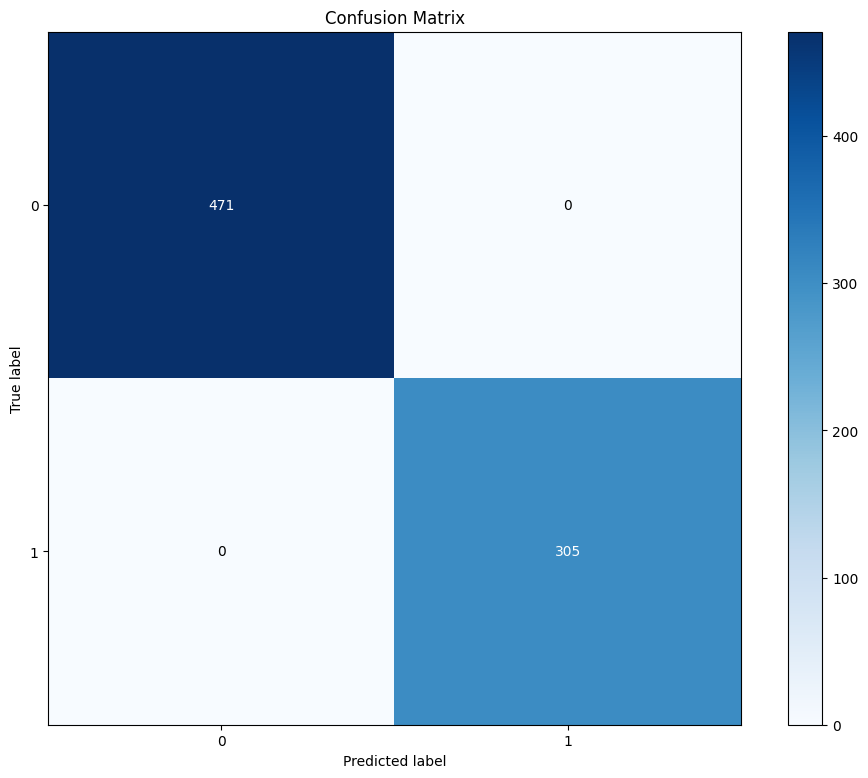

In [87]:
ReportPerformance(total_y_test, total_y_pred)
ViewAccuracy(total_y_test, total_y_pred)
ViewConfusionMatrix(total_y_test.astype(int), total_y_pred.astype(int))


Regression

In [88]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None
        self.attribute_types = None

    def fit(self, X, y, attribute_types):
        self.attribute_types = attribute_types
        self.root = self._build_tree(X.to_numpy(), y, attribute_types, depth=0)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i, sample in enumerate(X.to_numpy()):
            node = self.root
            while node.left:
                if self.attribute_types[node.feature_idx] == 1:
                    if sample[node.feature_idx] <= node.threshold:
                        node = node.left
                    else:
                        node = node.right
                else:
                    if sample[node.feature_idx] == node.threshold:
                        node = node.left
                    else:
                        node = node.right
            y_pred[i] = node.value
        return y_pred

    def _build_tree(self, X, y, attribute_types, depth):
        n_samples, n_features = X.shape
        
        if depth == self.max_depth or n_samples <= 1:
            leaf_value = np.mean(y)
            return Node(value=leaf_value)

        best_feature_idx, best_threshold = self._best_split(X, y, attribute_types, n_samples, n_features)

        if best_feature_idx is None:
            leaf_value = np.mean(y)
            return Node(value=leaf_value)
      
        left_indices = X[:, best_feature_idx] <= best_threshold
        right_indices = X[:, best_feature_idx] > best_threshold
        left = self._build_tree(X[left_indices], y[left_indices], attribute_types, depth + 1)
        right = self._build_tree(X[right_indices], y[right_indices], attribute_types, depth + 1)

        return Node(best_feature_idx, best_threshold, left=left, right=right, value=None)

    def _best_split(self, X, y, attribute_types, n_samples, n_features):
        best_mse = np.inf
        best_feature_idx = None
        best_threshold = None

        for feature_idx in range(n_features):
            if attribute_types[feature_idx] == 1:

                feature_values = np.sort(np.unique(X[:, feature_idx]))
                thresholds = (feature_values[:-1] + feature_values[1:]) / 2

             
                for threshold in thresholds:
                    mse = self._mse(X, y, feature_idx, threshold)
                    if mse < best_mse:
                        best_mse = mse
                        best_feature_idx = feature_idx
                        best_threshold = threshold
            else:
                unique_vals = np.unique(X[:, feature_idx])
                for val in unique_vals:
                    mse = self._mse(X, y, feature_idx, val)
                    if mse < best_mse:
                        best_mse = mse
                        best_feature_idx = feature_idx
                        best_threshold = val
        
        return best_feature_idx, best_threshold

    def _mse(self, X, y, feature_idx, threshold):
        left_indices = X[:, feature_idx] <= threshold
        right_indices = X[:, feature_idx] > threshold

        y_left, y_right = y[left_indices], y[right_indices]
        mse_left = np.mean((y_left - np.mean(y_left)) ** 2)
        mse_right = np.mean((y_right - np.mean(y_right)) ** 2)
        n_left, n_right = len(y_left), len(y_right)
        total_samples = n_left + n_right
        mse = (n_left / total_samples) * mse_left + (n_right / total_samples) * mse_right

        return mse



In [89]:
def build_dt_regressor(X, y, attribute_types, options=None):
    tree = DecisionTreeRegressor(max_depth=None)
    tree.fit(X, y, attribute_types)   
    return tree


In [90]:
def predict_dt_regressor(dt, X, options=None):
    return dt.predict(X)

In [91]:
dataset = day_data.copy()

X = dataset.drop("cnt", axis = 1)
y = dataset['cnt']

X = pd.DataFrame(X)



# define the number of folds for k-fold cross-validation
n_splits = 6  # number of folds for k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)


mse_scores_ = np.zeros(n_splits)
r2_scores_ = np.zeros(n_splits)

fold = 0

total_y_test = []
total_y_pred = []


for tr, te in kf.split(dataset):
    x_train, x_test = X.iloc[tr], X.iloc[te]
    y_train, y_test = y.iloc[tr], y.iloc[te]

        
    dt_regressor = build_dt_regressor(x_train,y_train,day_dataset_attribute_types)
    y_pred = predict_dt_regressor(dt_regressor,x_test)

    
    # Convert y_pred to a NumPy array  
    y_pred = np.array(y_pred)


    total_y_test += y_test.tolist()
    total_y_pred += y_pred.tolist()
    

    # Compute the mean squared error and R2 score
    mse_scores_[fold] = mean_squared_error(y_test, y_pred)
      
    fold += 1


total_y_test = np.array(total_y_test)
total_y_pred = np.array(total_y_pred)

print('Mean MSE score: ', mse_scores_.mean())


Mean MSE score:  44373.30839317166


## Random Forest

Classification

In [92]:
class RandomForest:
    def __init__(self, n_trees, max_depth=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []
        

    def fit(self, X, y, attribute_types):
        for i in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth)
            bootstrap_indices = np.random.choice(len(X), size=len(X), replace=True)
            bootstrap_X = X[bootstrap_indices]
            bootstrap_y = y[bootstrap_indices]
            tree.fit(bootstrap_X, bootstrap_y, attribute_types)
            self.trees.append(tree)

    def predict(self, X):
        y_preds = np.zeros((len(X), len(self.trees)))
        for i, tree in enumerate(self.trees):
            y_preds[:, i] = tree.predict(X)
        return mode(y_preds, axis=1,keepdims=False)[0].flatten()



In [93]:
def build_rdf(X, y, attribute_types, N, options=None):
    rdf = RandomForest(n_trees=N)
    rdf.fit(X, y, attribute_types)
    return rdf

In [94]:
def predict_rdf(rdf, X, options=None):
    return rdf.predict(X)

In [95]:
dataset = audit_risk_data.copy()

X = dataset.drop("Risk", axis = 1)
y = dataset['Risk']

# define the number of folds for k-fold cross-validation
n_splits = 6  # number of folds for k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)
total_y_test = []
total_y_pred = []

for tr, te in kf.split(dataset):        
    
    x_train, x_test = X.iloc[tr], X.iloc[te]
    y_train, y_test = y.iloc[tr], y.iloc[te]

    # Convert X_train and y_train to NumPy arrays
    x_train = np.array(x_train)
    y_train = np.array(y_train)

    # Convert X_test and y_test to a NumPy array
    x_test = np.array(x_test)
    y_test = np.array(y_test)

    rdf = build_rdf(x_train,y_train,attribute_types,10)
    y_pred = predict_rdf(rdf,x_test)

    # Convert y_pred to a NumPy array  
    y_pred = np.array(y_pred)
    
    total_y_test += y_test.tolist()
    total_y_pred += y_pred.tolist()
    
total_y_test = np.array(total_y_test)
total_y_pred = np.array(total_y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       471
           1       1.00      1.00      1.00       305

    accuracy                           1.00       776
   macro avg       1.00      1.00      1.00       776
weighted avg       1.00      1.00      1.00       776

Accuracy : % 100.0


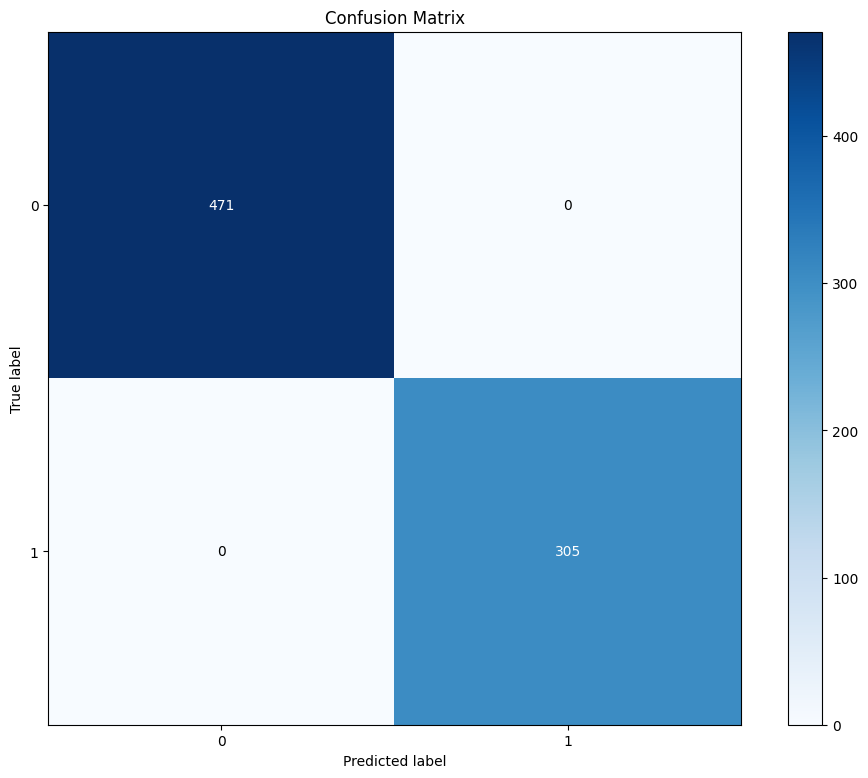

In [96]:
ReportPerformance(total_y_test, total_y_pred)
ViewAccuracy(total_y_test, total_y_pred)
ViewConfusionMatrix(total_y_test.astype(int), total_y_pred.astype(int))


Regression

In [97]:
class RandomForestRegressor:
    def __init__(self, n_trees, max_depth=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y, attribute_types):

        X = X.reset_index(drop=True)

        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            indices = np.random.choice(X.shape[0], X.shape[0], replace=True)
            tree.fit(X.iloc[indices], y.iloc[indices].values.ravel(), attribute_types)           
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.trees:
            y_pred += tree.predict(X)
        y_pred /= self.n_trees
        return y_pred


In [98]:
def build_rdf_regression(X, y, attribute_types, N, options=None):
    rdf = RandomForestRegressor(n_trees=N)
    rdf.fit(X, y, attribute_types)
    return rdf

In [99]:
def predict_rdf_regression(rdf, X, options=None):
    return rdf.predict(X)

In [100]:
dataset = day_data.copy()

X = dataset.drop("cnt", axis = 1)
y = dataset['cnt']

X = pd.DataFrame(X)



# define the number of folds for k-fold cross-validation
n_splits = 6  # number of folds for k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)


mse_scores_ = np.zeros(n_splits)
r2_scores_ = np.zeros(n_splits)

fold = 0

total_y_test = []
total_y_pred = []


for tr, te in kf.split(dataset):
    x_train, x_test = X.iloc[tr], X.iloc[te]
    y_train, y_test = y.iloc[tr], y.iloc[te]

    
    rdf_regressor = build_rdf_regression(x_train,y_train,day_dataset_attribute_types,10)
    y_pred = predict_rdf_regression(rdf_regressor,x_test)

    
    # Convert y_pred to a NumPy array  
    y_pred = np.array(y_pred)


    total_y_test += y_test.tolist()
    total_y_pred += y_pred.tolist()
    

    # Compute the mean squared error and R2 score
    mse_scores_[fold] = mean_squared_error(y_test, y_pred)
      
    fold += 1


total_y_test = np.array(total_y_test)
total_y_pred = np.array(total_y_pred)

print('Mean MSE score: ', mse_scores_.mean())


Mean MSE score:  21737.51250406449
